# Sensitivity Analysis of the Soil Moisture Dataset

Soil Moisture Dataset

Libraries we need are imported first

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import xarray as xr
from scipy.interpolate import griddata
from scipy import interpolate
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

Data used in this exercise is stored in the DATA folder

In [93]:
thefile = '../../../DATA/TPdata_199301'

The dataframe is created using the .read_csv function of Pandas

In [96]:
data = pd.read_csv(thefile, sep='\t', header=None)

The original CSV file is structured as a dataframe with the corresponding categories

In [99]:
data.columns = ["cellNr", "latitude", "longitude", "backscatter","emissivity_v","emissivity_h","ts_amplitude","ndvi","lmd_soilWetness"]

In [101]:
data = data.replace('   NaN',pd.NA)

In [103]:
data['backscatter'] = pd.to_numeric(data['backscatter'])
data['emissivity_v'] = pd.to_numeric(data['emissivity_v'])
data['emissivity_h'] = pd.to_numeric(data['emissivity_h'])
data['ts_amplitude'] = pd.to_numeric(data['ts_amplitude'])
data['ndvi'] = pd.to_numeric(data['ndvi'])
data['lmd_soilWetness'] = pd.to_numeric(data['lmd_soilWetness'])

In [105]:
data = data.dropna()

## Scatter Plots

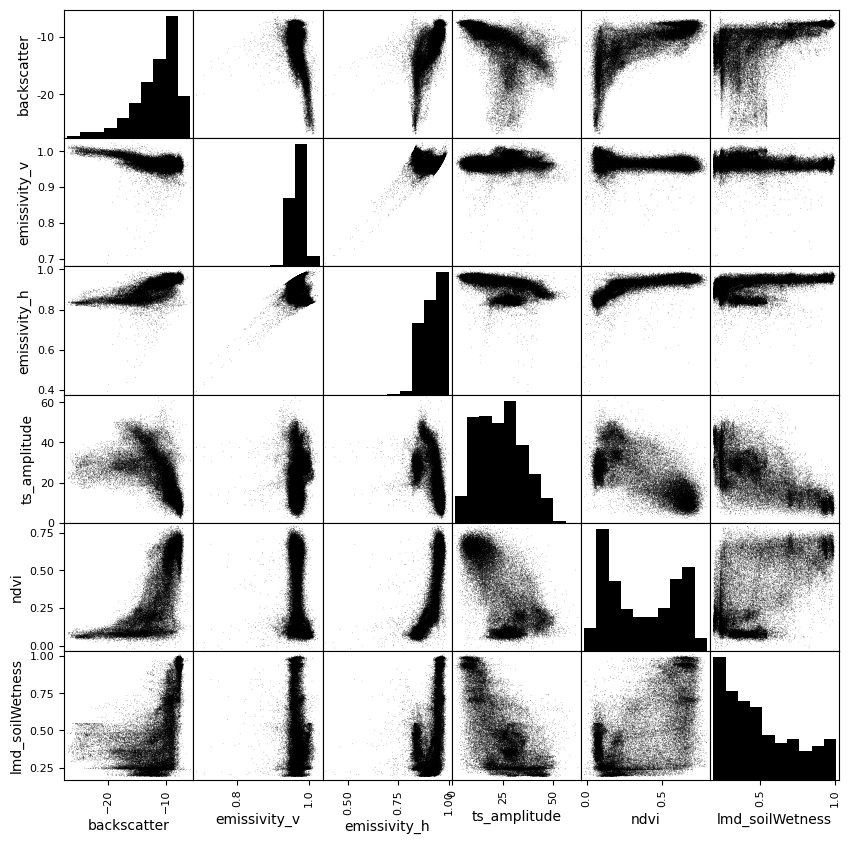

In [108]:
fig, ax = pl.subplots(figsize=(10, 10)) 
ax = pd.plotting.scatter_matrix(data[['backscatter', 'emissivity_v','emissivity_h','ts_amplitude','ndvi','lmd_soilWetness']],ax=ax,s=1,c='k',hist_kwds={'color':['black']});

## Correlation Coefficients

In [24]:
data.corr(min_periods=3)

,cellNr,latitude,longitude,backscatter,emissivity_v,emissivity_h,ts_amplitude,ndvi,lmd_soilWetness
cellNr,1.000000,0.999673,-0.070898,-0.244974,0.191138,-0.324772,-0.142787,-0.411075,-0.012247
latitude,0.999673,1.000000,-0.068802,-0.238776,0.188661,-0.319454,-0.148162,-0.405415,-0.010330
longitude,-0.070898,-0.068802,1.000000,-0.282649,0.059293,-0.273794,0.433614,-0.342926,-0.321579
backscatter,-0.244974,-0.238776,-0.282649,1.000000,-0.546260,0.734116,-0.543246,0.731294,0.507656
emissivity_v,0.191138,0.188661,0.059293,-0.546260,1.000000,-0.007722,0.085045,-0.230334,-0.148656
emissivity_h,-0.324772,-0.319454,-0.273794,0.734116,-0.007722,1.000000,-0.512372,0.804035,0.467541
ts_amplitude,-0.142787,-0.148162,0.433614,-0.543246,0.085045,-0.512372,1.000000,-0.689494,-0.686003
ndvi,-0.411075,-0.405415,-0.342926,0.731294,-0.230334,0.804035,-0.689494,1.000000,0.604335
lmd_soilWetness,-0.012247,-0.010330,-0.321579,0.507656,-0.148656,0.467541,-0.686003,0.604335,1.000000


## Simple Linear Regression

In [111]:
X = pd.DataFrame({'intercept':np.ones(data.shape[0]),'TS_amplitude':data['ts_amplitude']})
X

,intercept,TS_amplitude
63715,1.0,22.8432
65425,1.0,24.4724
68907,1.0,36.5638
68908,1.0,39.3991
70678,1.0,40.4082
...,...,...
596855,1.0,9.6753
597727,1.0,5.9767
601035,1.0,12.8538
604434,1.0,5.0433


In [113]:
y = data['lmd_soilWetness']
model = sm.OLS(y,X)
results = model.fit()

In [115]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        lmd_soilWetness   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                 3.958e+04
Date:                Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                        13:22:08   Log-Likelihood:                 15593.
No. Observations:               44531   AIC:                        -3.118e+04
Df Residuals:                   44529   BIC:                        -3.116e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.8444      0.002    437.677      0.000       0.841       0.848
TS_amplitude    -0.0145   7.29e-05   -198.955      0.000      -0.015      -0.014
==============================================================================
Omnibus:                      846.429   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              495.497
Skew:                          -0.088   Prob(JB):                    2.54e-108
Kurtosis:                       2.514   Cond. No.                         63.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
results.params

intercept       0.844423
TS_amplitude   -0.014513
dtype: float64

In [119]:
def abline(ax, b,m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim,ylim,c='r',linewidth=2)

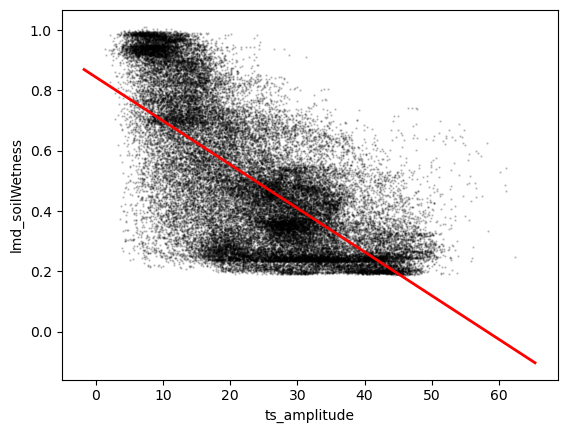

In [129]:
ax = data.plot.scatter('ts_amplitude','lmd_soilWetness',s=.5,color='k',alpha=0.2)
abline(ax, results.params[0],results.params[1])